# Исследование надёжности заёмщиков


**Автор**: Григорьев Павел   


**Описание проекта**: Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.  
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.  


**Цель**: Составить рекомендации для кредитного отдела банка, которые будут учтены при построении модели кредитного скоринга.  
Определить влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.  

**Источники данных**: Данные предоставленны кредитным отделом банка.


**Вывод**: тут помещаем самое главное из общего вывода, примерно до полустраницы, чтобы не было сильно много и при этом указать все главные выводы


**Оглавление** 
* [1. Описание и изучение данных](#1)
    * [1.1 Изучение данных](#1-1)
    * [1.2 Изучение данных](#1-2)



(опционально, зависит от того есть ли оглавление по умолчанию, но лучше сделать скрываемое, так как не везде будет автоматическое):  
создаем оглавление с гиперссылками  
Тут важно давать развернутые названия разделам в работе, но и не сильно большие (пиши - сокращай).  
Все таки это название главы и оно должно быть не более 5-7 слов. Некоторые могут быть длиннее, если сильно нужно,  
но основная часть названий разделов и глав долны быть достаточно кратикими.   
Чтобы понять длинные ли заголовки - смотрим на оглавление и думаем не сильно ли шировкие строчки.  
Чтобы в оглавление хорошо читалось и было понятно про что каждый раздел и глава и чтобы  
можно было прочитать, понять и перейти к разделу. Нельзя писать сильно кратко, так как люди не знакомы с работой и им нужно более развернутые  
названия глав, чтобы понимать о чем там будет идти речь  
Оглавление делаем со сворачивающимися списками, то есть каждую главу можно свернуть, можно развернуть и пеерейти на уровень ниже,  
как в сводных таблицах экселя, так удобнее, так как места занимает мало, если скрыть все подразделы, а если нужно, то раскроют  
В каждом блоке сделать гиперссылку 'к содержанию', чтобы можно было вернуться к содержанию,  
но тут важно, чтобы на одной странице не было больше 1 такой ссылки.   
Заголовки разделов и глав не нужно писать в стиле 'посчитаем, выясним, исследуем и подобное', так как названия глав и разделов это более официальные  
названия. Нужно более формально их называть.  
Название главы или раздела должно нести в себе основной смысл этого раздела или главы, так и нужно называть.  
1. Описание данных
2. Предобработка данных
3. Расчет метрик
    3.1 Продуктовые метрики
        3.1.1 Расчет MAU, DAU, WAU
        3.1.2 Рачет ASL
4. Подведение итогов и регкомендации       


### Загрузка библиотек

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets, Layout
from IPython.display import display, display_html, display_markdown
import my_module
import importlib
import re
import itertools
from pymystem3 import Mystem
importlib.reload(my_module)
import chart_studio
import chart_studio.plotly as py
sns.set(style="white")
from termcolor import colored
import scipy.stats as stats
import statsmodels.stats.api as stm
# with httpimport.remote_repo('http://my-codes.example.com/python_packages'):
#     import package1

# chart_studio.tools.set_credentials_file(username="bestorlov1992", api_key="TOnnvREBwfkILt9ABEr5")
# # from jupyter to chart studio
# py.plot(fig, filename = "plot name", auto_open = True)

c:\python\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


### 1. Описание и изучение данных <a class="anchor" id="1"></a>

#### 1.1 Описание данных <a class="anchor" id="1-1"></a>
- children - количество детей в семье
- days_employed - общий трудовой стаж в днях
- dob_years - возраст клиента в годах
- education - уровень образования клиента
- education_id - идентификатор уровня образования
- family_status - семейное положение
- family_status_id - идентификатор семейного положения
- gender - пол клиента
- income_type - тип занятости
- debt - имел ли задолженность по возврату кредитов
- total_income - ежемесячный доход
- purpose - цель получения кредита

#### 1.2 Изучение данных <a class="anchor" id="1-2"></a>

In [4]:
dtype = {'education': 'category', 'education_id': 'category', 'family_status': 'category', 'family_status_id': 'category', 'gender': 'category', 'income_type': 'category', 'debt': 'category'}
df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv', dtype=dtype)
df.sample(5, random_state=7)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4042,1,-2885.142188,50,среднее,1,женат / замужем,0,F,сотрудник,0,80236.028323,приобретение автомобиля
19177,2,-1803.080913,36,Среднее,1,женат / замужем,0,F,сотрудник,0,163292.220004,строительство собственной недвижимости
7372,1,-305.540665,27,СРЕДНЕЕ,1,гражданский брак,1,F,сотрудник,0,69799.488812,ремонт жилью
16245,1,-1593.946336,50,среднее,1,женат / замужем,0,F,сотрудник,1,107486.332934,на покупку подержанного автомобиля
11563,0,-1025.402943,64,высшее,0,женат / замужем,0,M,госслужащий,0,706401.475790,профильное образование


Изменим название колонки dob_years на более понятное age

In [ ]:
df = df.rename(columns={'dob_years': 'age'})

In [209]:
gen = my_module.my_info_gen(df)

In [10]:
next(gen)

Output()

**Наблюдения:**  
В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  
Если заменить все пробелы на 1, привести к нижнему регистру, то дополнительно появляется 31 дубликат.  
Нужно детаельнее изучить дубликаты.  

In [11]:
next(gen)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

GridBox(children=(Output(), Output(), Output(), Output(), Output(), Output()), layout=Layout(grid_template_col…

**Наблюдения:**  
- В столбце с количеством детей нет пропущенных значений.  
- Уникальных всего 8 значений. Это нормально. Количество детей не может сильно варьироваться. 
- Наличие нулей нормально, это люди без детей, таких 66 %.  
- Есть отрицательные значения.  47 штук. Меньше 1 процента. Это явно ошибка. В реальных данных таких не должно быть.   
Нужно выяснить почему появились отрицательное количество детей.  
- Максимальное количество детей 20. Это скорее всего ошибка. 
- 66 прцоентов имеют 0 детей, 22 прцоента имеют 1 ребенка, 10 % имеют 2 детей и меньше 5 % имеют более 2 детей.  
- Распределение детей соответсвует реальности, больше всего людей без детей.


In [25]:
next(gen)

GridBox(children=(Output(), Output(), Output(), Output(), Output(), Output()), layout=Layout(grid_template_col…

**Наблюдения:**  
- В колонке общий трудовой стаж есть 10 % пропущенных значений.  
- 90 % уникальных значений, это нормально, так как стаж в днях.  
- 74 % отрицаетльных значений. Так быть не должно.   
Нужно выяснить как считаются дни стажа и разобраться откуда появляются отрицательные значения.  
- Максимальное количество дней стажа больше 400 тысяч дней, это больше 1000 лет. Явно это выброс.  
- Данные совершенно некоректные, нужно разбираться что является причиной.  

In [32]:
next(gen)

GridBox(children=(Output(), Output(), Output(), Output(), Output(), Output()), layout=Layout(grid_template_col…

**Наблюдения:**  
- В колонке возраста нет пропущенных значений.  
- 58 уникаьных значений (<1%), похоже на правду.  
- 101 нулевое значени. Это явно ошибки.  
- Максимальный возраст 75 лет. Впролне реально.  
- Медиана 42 года, первый квартиль 33 года, можно сделать вывод, что у нас восновном люди старше 30 лет.  
- Больше всего людей около 40 лет.  
- Только 5 процентов людей моложе 25 лет.  
- Распределение похоже на нормальное. Так и должно быть.  

In [33]:
next(gen)

GridBox(children=(Output(), Output(), Output(), Output(), Output(), Output()), layout=Layout(grid_template_col…

**Наблюдения:**  
- В столбце дохода 10 процентов пропущенных значений.  
- Есть дубликаты, но это нормально.  
- максимальный доход больше 2 млн, нужно проверить это, кажется что это нереально.  
- Минимальная зарплата 20 тысяч, это похоже на истину.  
- Распределение зарплат соответствует реальности.  
- Меньше 5 % людей имеют зарплату меньша 63 тысяч.  
Можно сделать вывод, что большинство имеет высокий доход.  
При этом 25 % имеют доход больше 200 тысяч.  

In [34]:
next(gen)

0it [00:00, ?it/s]

GridBox(children=(Output(), Output(), Output()), layout=Layout(grid_template_columns='auto auto auto'))

**Наблюдения:**
- В колонке образование пропусков нет.  
- Уникальных значений 15
- Присутствуют явные дубли из за разных регистров слов.  
- Болше всего людей со средним образованием 71 %
- Высшее образование у 24 % 

In [35]:
next(gen)

GridBox(children=(Output(), Output(), Output()), layout=Layout(grid_template_columns='auto auto auto'))

**Наблюдения:**  
- В колонке с id образонвания 5 униклаьных значений, хотя в колонке образования, если не учитывать регистр, 4 значения.  
Нужно разбираться.  

In [36]:
next(gen)

GridBox(children=(Output(), Output(), Output()), layout=Layout(grid_template_columns='auto auto auto'))

**Наблюдения:**  
- В колонке семейного статуса пропусков нет
- Проблем не обнаружено
- 58 % женаты либо замужем
- 19 % в гражданском браке
- Можно сделать вывод что большинство в браке.  

In [37]:
next(gen)

GridBox(children=(Output(), Output(), Output()), layout=Layout(grid_template_columns='auto auto auto'))

**Наблюдения:**
- Колонке семейный статус id проблем не обнаружено, значения совпадают со столбцом семейный статус

In [38]:
next(gen)

GridBox(children=(Output(), Output(), Output()), layout=Layout(grid_template_columns='auto auto auto'))

**Наблюдения:**
- В возрасте пропусков нет
- 3 уникальных значения 
- Значение XNA меньше чем у 1 %, возможно не указали пол
- 66 % женщины, можно сделать вывод, что большинство женщины

In [39]:
next(gen)

GridBox(children=(Output(), Output(), Output()), layout=Layout(grid_template_columns='auto auto auto'))

**Наблюдения:**
- В столбце тип занятости 8 уникальных значений.  
- Больше всего сотрудников (52 %)
- 24 % компаньены
- 18 % пенсионеры
- Меньше 1 % безработных. 
- Можно сделать вывод, что большинство либо пенсионеры, либо имеют занятость
- Также меньше 1 % предприниматели.

In [42]:
next(gen)

GridBox(children=(Output(), Output(), Output()), layout=Layout(grid_template_columns='auto auto auto'))

**Наблюдения:**  
- В колонке наличия долга 2 значения.  
- Пропусков нет
- 92 % не имеют долга

In [43]:
next(gen)

GridBox(children=(Output(), Output(), Output()), layout=Layout(grid_template_columns='auto auto auto'))

**Наблюдения:**
- В колонке цель кредита пропуско нет  
- 38 униклаьных значений, немного, но все таки есть похожие цели, нужно будет объеденить в одно значение
- Ярко выраженной цели кредита нет, но сложно точно определить, нужно объеденить сначала похожие цели.  

Для дальнейшего анализа срауз приведем колонку education к нижнему регистру и удалим лишние пробелы

In [39]:
df.education = my_module.normalize_string_series(df.education)
df.education.value_counts()

среднее                15073
высшее                  5202
неоконченное высшее      739
начальное                282
ученая степень             6
Name: education, dtype: int64

Проверка на ошибки целостности  
Если у нас есть столбцы, в которых значения должны совпдаать попарно, то проверяем на это.

In [47]:
my_module.get_non_matching_rows(df, 'education', 'education_id')

Нет строк для которых значения в col1 имеют разные значения в col2


Нет проблем с целостностью в образонвании, несмотря на дубли в образовании. 

In [48]:
my_module.get_non_matching_rows(df, 'family_status', 'family_status_id')

Нет строк для которых значения в col1 имеют разные значения в col2


В семейном статусе также нет проблем с целостностью.  

Проверим на дубли

Плсмльоим на дубли во всем датафрейме

In [3]:
dupl_df = my_module.check_duplicated(df)

Duplicated is 54 (0.3%) rows


У нас 54 полных дубля в таблице. Посмотрим на них. 

In [58]:
dupl_df.head(10)

Count
children days_employed dob_years education education_id family_status    family_status_id gender income_type debt total_income purpose                                     
0        NaN           58        среднее   1            гражданский брак 1                f      пенсионер   0    NaN          сыграть свадьбу                            3
                       62        среднее   1            женат / замужем  0                f      пенсионер   0    NaN          ремонт жилью                               3
                       47        среднее   1            женат / замужем  0                f      сотрудник   0    NaN          ремонт жилью                               3
                       71        среднее   1            гражданский брак 1                f      пенсионер   0    NaN          на проведение свадьбы                      3
                       58        среднее   1            гражданский брак 1                m      сотрудник   0    NaN          на проведение свадьбы                      3
                       54        высшее    0            женат / замужем  0                m      компаньон   0    NaN          операции с коммерческой недвижимостью      2
                       41        среднее   1            женат / замужем  0                f      сотрудник   0    NaN          свой автомобиль                            2
2        NaN           39        среднее   1            гражданский брак 1                f      сотрудник   0    NaN          сыграть свадьбу                            2
0        NaN           56        среднее   1            гражданский брак 1                f      сотрудник   0    NaN          сыграть свадьбу                            2
1        NaN           37        среднее   1            женат / замужем  0                f      сотрудник   0    NaN          покупка недвижимости                       2

**Наблюдения:**
- Так как у нас нет уникального идентификатора клиентов, то дубли это нормально
- Также у нас в строках с дублями есть пропуски в некоторых столбцах, если бы не было пропусков,  
то возможно дублей было бы меньше, так как было бы больше детализации

Посмотрим сколько у нас дублей в каждой колонке

In [4]:
series_duplicated = my_module.find_columns_with_duplicates(df)

children,21517 (99.96%)
days_employed,2173 (10.10%)
dob_years,21467 (99.73%)
education,21510 (99.93%)
education_id,21520 (99.98%)
family_status,21520 (99.98%)
family_status_id,21520 (99.98%)
gender,21522 (99.99%)
income_type,21517 (99.96%)
debt,21523 (99.99%)
total_income,2173 (10.10%)


Посмотрим на дубликаты между парами колонок

In [126]:
gen = my_module.check_duplicated_combinations_gen(df)
next(gen)

Group by 2 columns


,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
children,,,,,,,,,
dob_years,21088,,,,,,,,
education,21246,20804,,,,,,,
family_status,21275,21035,21241,,,,,,
gender,21289,21189,21273,21291,,,,,
income_type,21274,21086,21246,21276,21287,,,,
debt,21291,21191,21275,21292,21297,21289,,,
total_income,1914,1032,2073,2046,2069,2071,2018,,
purpose,21117,19316,20916,21124,21225,21144,21226,1084,


**Наблюдения:**
- У нас большинство колонок имеют попраные дубликаты, это скорее всего вызвано пропусками
- Если бы не было пропусков в колонках стажа и дохода, то дублей было бы меньше

Проверяем на пропуски    

In [5]:
series_missed = my_module.find_columns_with_missing_values(df)

days_employed,2174 (10.10%)
total_income,2174 (10.10%)


У нас пропуски в колонке со стажем и в колокне с доходом.  
Посмотрим на строки датафрейма с пропусками.  

In [14]:
days_employed_missed = series_missed['days_employed']
total_income_missed = series_missed['total_income']

Количество пропусков совпдаает с точностью до строки.  
Выдвигаем гипотезу, что пропуски в обоих колонках в одних и тех же строках. 

Проверим эту гипотезу

Посмотрим на стаж

In [11]:
days_employed_missed.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4634,0,NaN,64,среднее,1,в разводе,3,F,сотрудник,0,NaN,высшее образование
8086,0,NaN,23,среднее,1,Не женат / не замужем,4,M,сотрудник,0,NaN,приобретение автомобиля
9096,0,NaN,47,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,покупка жилья для семьи
1052,2,NaN,35,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,операции с недвижимостью
5802,0,NaN,29,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,операции с коммерческой недвижимостью
9374,0,NaN,38,высшее,0,гражданский брак,1,F,компаньон,0,NaN,на проведение свадьбы
12911,0,NaN,52,среднее,1,Не женат / не замужем,4,M,пенсионер,1,NaN,на покупку своего автомобиля
16395,0,NaN,29,высшее,0,гражданский брак,1,F,сотрудник,0,NaN,сыграть свадьбу
11754,0,NaN,42,высшее,0,гражданский брак,1,F,сотрудник,0,NaN,сыграть свадьбу
12937,1,NaN,38,среднее,1,женат / замужем,0,M,компаньон,0,NaN,автомобили


**Наблюдения:**
- 10 случайно взятых строк подтверждают гипотезу

Посмотрим на доход

In [17]:
total_income_missed.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16328,0,NaN,51,среднее,1,Не женат / не замужем,4,F,компаньон,0,NaN,покупка недвижимости
19433,0,NaN,48,высшее,0,гражданский брак,1,F,компаньон,0,NaN,на проведение свадьбы
2644,2,NaN,40,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,на проведение свадьбы
3062,0,NaN,42,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,операции с жильем
20501,2,NaN,33,высшее,0,женат / замужем,0,M,компаньон,0,NaN,заняться высшим образованием
15571,0,NaN,36,Среднее,1,женат / замужем,0,M,сотрудник,0,NaN,операции со своей недвижимостью
8128,0,NaN,36,среднее,1,Не женат / не замужем,4,M,сотрудник,0,NaN,приобретение автомобиля
14742,0,NaN,23,среднее,1,Не женат / не замужем,4,F,сотрудник,0,NaN,строительство недвижимости
16148,0,NaN,45,среднее,1,гражданский брак,1,F,компаньон,0,NaN,свадьба
14378,0,NaN,36,среднее,1,гражданский брак,1,M,сотрудник,0,NaN,жилье


**Наблюдения:**
- 10 случайно взятых строк подтверждают гипотезу

Посмотрим сколько пропусков в обоих колонках вместе

In [14]:
df_missed_employed_income = my_module.check_na_in_both_columns(df, ['days_employed', 'total_income'])

2174 (10.10%) rows with missings simultaneously in ['days_employed', 'total_income']


**Наблюдения:**
- Видим, что совместно пропуски в таком количестве строк как и по отдельности. 
Гипотеза подтвердилась. У нас пропуски в строке стаж связаны с пропусками в строке доход.  
Возможно это вызвано тем, что при расчете дохода испльзуется стаж, либо существует другое влияние одного на другое.  

Изучаем выбросы

Сначала изучим потенциальные выбросы, которые мы выявили при изучении колонок.  
У нас в количестве детей есть значение 20.   
Изучим его подробнее.  

In [50]:
outliers_series = pd.Series([df[df.children == 20]], index=['children'])
gen = my_module.analys_by_category_gen(df, outliers_series)
next(gen)

Value counts outliers


,outliers
20,76


In [54]:
next(gen)

family_status,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
Не женат / не замужем,2813,24,0.9%,4.8%,13.1%
в разводе,1195,18,1.5%,3.6%,5.6%
вдовец / вдова,960,15,1.6%,3.0%,4.5%
гражданский брак,4177,83,2.0%,16.5%,19.4%
женат / замужем,12380,363,2.9%,72.2%,57.5%


**Наблюдения:** 
- Значительная часть людей с 20 детьми находятся в браке.  

In [127]:
next(gen)

income_type,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
безработный,2,0,0.0%,0.0%,0.0%
в декрете,1,0,0.0%,0.0%,0.0%
госслужащий,1449,46,3.2%,10.2%,6.8%
компаньон,5056,105,2.1%,23.2%,23.7%
пенсионер,3828,16,0.4%,3.5%,17.9%
предприниматель,2,0,0.0%,0.0%,0.0%
сотрудник,11038,286,2.6%,63.1%,51.6%
студент,1,0,0.0%,0.0%,0.0%


**Наблюдения:** 
- Большая часть сотрудники
- Пенсионеры имеют меньшую долю с 20 детьми чем в основном количестве.  

У нас в доходе странные максимальные значения нужно их изучить

In [68]:
outliers_series = pd.Series([df[df.total_income > 1000000]], index=['total_income'])
gen = my_module.analys_by_category_gen(df, outliers_series)
next(gen)

Value counts outliers


,outliers
1089120.307966902,1
1172459.831538252,1
1223042.4798556922,1
2200852.210258896,1
1091627.5854744776,1
1092608.2025471018,1
1551152.8938321068,1
1427934.4631516722,1
1027742.2793171688,1
1597613.490466747,1


In [69]:
next(gen)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
15047,2,-1654.855987,39,высшее,0,женат / замужем,0,M,сотрудник,0,1058193.472277,получение образования
19338,3,-1733.364682,34,высшее,0,женат / замужем,0,M,сотрудник,0,1091627.585474,операции с жильем
18347,0,-5536.801152,35,высшее,0,гражданский брак,1,F,компаньон,0,1027742.279317,операции с жильем
13090,1,-3531.320534,54,высшее,0,в разводе,3,F,компаньон,0,1128836.256218,операции с недвижимостью
10004,0,-1979.388318,58,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,1097954.737993,покупка своего жилья
18766,2,-1019.604773,43,высшее,0,женат / замужем,0,M,компаньон,0,1092608.202547,строительство недвижимости
9169,1,-5248.554336,35,среднее,1,гражданский брак,1,M,сотрудник,0,1726276.014332,дополнительное образование
17178,0,-5734.127087,42,высшее,0,гражданский брак,1,M,компаньон,0,1711309.267674,сыграть свадьбу
7447,0,-8626.777234,39,среднее,1,в разводе,3,F,сотрудник,0,1240165.001862,покупка недвижимости
18368,1,-333.935516,41,ВЫСШЕЕ,0,гражданский брак,1,M,компаньон,0,1551152.893832,свадьба


Посмотрим на выбросы через квантили

In [23]:
series_outliers = my_module.detect_outliers_quantile(df)

children,503 (2.34%)
days_employed,1936 (8.99%)
dob_years,1877 (8.72%)
total_income,1936 (8.99%)


**Наблюдения:** 
- интересно что количество выбросво, кроме колонки количество детей, примерно одинаковое

Изучим выбросы в разрезе категорий

In [35]:
gen = my_module.analys_by_category_gen(df, series_outliers)
next(gen)

Value counts outliers


,outliers
3,330
20,76
-1,47
4,41
5,9


**Наблюдения:** 
- Видим, что клиенты с количеством больше 2 попали в выбросы, что логично
- Также -1 попало в выброс, что тоже верно

In [103]:
next(gen)

family_status,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
Не женат / не замужем,2813,24,0.9%,4.8%,13.1%
в разводе,1195,18,1.5%,3.6%,5.6%
вдовец / вдова,960,15,1.6%,3.0%,4.5%
гражданский брак,4177,83,2.0%,16.5%,19.4%
женат / замужем,12380,363,2.9%,72.2%,57.5%


**Наблюдения:**
- женат / замужем содержит значительно больше выбросов, даже учитывая что в общем количестве их тоже больше

In [105]:
next(gen)

gender,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
F,14236,313,2.2%,62.2%,66.1%
M,7288,190,2.6%,37.8%,33.9%
XNA,1,0,0.0%,0.0%,0.0%


**Наблюдения:**
- У мужчин немного побольше выбросов, учитывая размер группы мужчин

In [106]:
next(gen)

income_type,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
безработный,2,0,0.0%,0.0%,0.0%
в декрете,1,0,0.0%,0.0%,0.0%
госслужащий,1459,50,3.4%,9.9%,6.8%
компаньон,5085,114,2.2%,22.7%,23.6%
пенсионер,3856,24,0.6%,4.8%,17.9%
предприниматель,2,0,0.0%,0.0%,0.0%
сотрудник,11119,315,2.8%,62.6%,51.7%
студент,1,0,0.0%,0.0%,0.0%


**Наблюдения:**
- Больше всего выбросов у сотрудников, даже болше чем пропорция сотрудников в общем количестве

In [198]:
next(gen)

family_status,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
Не женат / не замужем,2813,182,6.5%,9.4%,13.1%
в разводе,1195,118,9.9%,6.1%,5.6%
вдовец / вдова,960,169,17.6%,8.7%,4.5%
гражданский брак,4177,346,8.3%,17.9%,19.4%
женат / замужем,12380,1121,9.1%,57.9%,57.5%


**Наблюдения:**
- вдовец / вдова имеет больше процент пропусков чем пропроция в общем количестве

In [200]:
next(gen)

gender,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
F,14236,1544,10.8%,79.8%,66.1%
M,7288,392,5.4%,20.2%,33.9%
XNA,1,0,0.0%,0.0%,0.0%


**Наблюдения:**
- У женщин выбросов в стаже намного болше чем у мужчин, даже учитывая что женщин больше всего

In [201]:
next(gen)

income_type,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
безработный,2,1,50.0%,0.1%,0.0%
в декрете,1,0,0.0%,0.0%,0.0%
госслужащий,1459,183,12.5%,9.5%,6.8%
компаньон,5085,173,3.4%,8.9%,23.6%
пенсионер,3856,967,25.1%,49.9%,17.9%
предприниматель,2,0,0.0%,0.0%,0.0%
сотрудник,11119,612,5.5%,31.6%,51.7%
студент,1,0,0.0%,0.0%,0.0%


**Наблюдения:**
- У пенсионеров значительно болше выбросов в стаже

In [202]:
next(gen)

debt,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
0,19784,1838,9.3%,94.9%,91.9%
1,1741,98,5.6%,5.1%,8.1%


**Наблюдения:**
- У женщин выбросов в стаже намного болше чем у мужчин, даже учитывая что женщин больше всего

In [203]:
next(gen)

,outliers
24,264
23,254
65,194
66,183
22,183
67,167
21,111
0,101
68,99
69,85


**Наблюдения:**
- В выбросы попали самые молодые и самые старые по возрасту, что логично, также попал 0

In [206]:
next(gen)

family_status,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
Не женат / не замужем,2813,465,16.5%,24.8%,13.1%
в разводе,1195,75,6.3%,4.0%,5.6%
вдовец / вдова,960,176,18.3%,9.4%,4.5%
гражданский брак,4177,385,9.2%,20.5%,19.4%
женат / замужем,12380,776,6.3%,41.3%,57.5%


**Наблюдения:**
- Не женат / не замужем выделяется по выбросам, учитывая пропроцию в общем количестве

In [209]:
next(gen)

income_type,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
безработный,2,0,0.0%,0.0%,0.0%
в декрете,1,0,0.0%,0.0%,0.0%
госслужащий,1459,69,4.7%,3.7%,6.8%
компаньон,5085,333,6.5%,17.7%,23.6%
пенсионер,3856,792,20.5%,42.2%,17.9%
предприниматель,2,0,0.0%,0.0%,0.0%
сотрудник,11119,682,6.1%,36.3%,51.7%
студент,1,1,100.0%,0.1%,0.0%


**Наблюдения:**
- У пенсионеров болше выбросов по возрасту, что логично

In [214]:
next(gen)

family_status,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
Не женат / не замужем,2813,217,7.7%,11.2%,13.1%
в разводе,1195,96,8.0%,5.0%,5.6%
вдовец / вдова,960,95,9.9%,4.9%,4.5%
гражданский брак,4177,336,8.0%,17.4%,19.4%
женат / замужем,12380,1192,9.6%,61.6%,57.5%


**Наблюдения:**
- У женатых больше выбросов по доходу

In [217]:
next(gen)

income_type,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
безработный,2,1,50.0%,0.1%,0.0%
в декрете,1,1,100.0%,0.1%,0.0%
госслужащий,1459,140,9.6%,7.2%,6.8%
компаньон,5085,488,9.6%,25.2%,23.6%
пенсионер,3856,500,13.0%,25.8%,17.9%
предприниматель,2,1,50.0%,0.1%,0.0%
сотрудник,11119,805,7.2%,41.6%,51.7%
студент,1,0,0.0%,0.0%,0.0%


**Наблюдения:**
- У пенсионеров больше выбросов по доходу

In [218]:
next(gen)

debt,total_count,outlier_count,outlier_in_category_pct,outlier_in_column_pct,total_count_pct
0,19784,1811,9.2%,93.5%,91.9%
1,1741,125,7.2%,6.5%,8.1%


**Наблюдения:**
- Без задолженности немного больше выбросов по доходу.  

#### 1.2 Промежуточный вывод

- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  
Так как у нас нет уникального идентификатора клиентов, то эти дубли не выглядят ошибкой.  
Также у нас в строках с дублями есть пропуски в некоторых столбцах, если бы не было пропусков,  
то возможно дублей было бы меньше, так как было бы больше детализации
- В столбце с количеством детей есть отрицательные значения.  47 штук. Меньше 1 процента. Также есть клиенты с 20 детьми. Что странно.  
Такое количество детей восвновном у людей в браке и сотрудников. У пенсионеров явно доля с 20 детьми меньше, чем доле пенсионеров в общем количестве людей. 
- Возможно 20 детей связано с тем, что во время ввода данных указали лишний ноль.  
Рекомендация, сделать проверку на отрицательные значения и на 20 детей, чтобы на стадии ввода не допускать ошибок.  
- 66 прцоентов имеют 0 детей, 22 прцоента имеют 1 ребенка, 10 % имеют 2 детей и меньше 5 % имеют более 2 детей.  
- В колонке общий трудовой стаж есть 10 % пропущенных значений.  
- 74 % отрицаетльных значений. Так быть не должно.  
- Максимальное количество дней стажа больше 400 тысяч дней, это больше 1000 лет. Явно это выброс.  
- Столбец со стажем выглядит некорректно. Нужно высянить методику расчета и разобраться в чем проблема.  
- В колонке возраста 101 нулевое значени. Это явно ошибки.  
- Медиана 42 года, первый квартиль 33 года, можно сделать вывод, что у нас восновном люди старше 30 лет.  
- Больше всего людей около 40 лет.  
- Только 5 процентов людей моложе 25 лет.  
- Колонка дохода имеет слишком много знаков после запятой. Нужно выяснить причину.  
- Доход боьше 1 млн может быть правдой. Тем более такой даоход в большинстве у мужчин с высшим образованием, у компаньонов или сотрудников.  
Нет оснований считать это выбросом. Максимаьный доход 2 млн. Также может быть реальным.
- Меньше 5 % людей имеют зарплату меньша 63 тысяч.  
Можно сделать вывод, что большинство имеет высокий доход.  
При этом 25 % имеют доход больше 200 тысяч.  
- В колонке с образованием присутствуют одни и те же знчения с разными регистрами. Нужно выяснить почему так происходит при загрузке.  
При этом в колонке с id образования все впрорядке.    
- Болше всего людей со средним образованием 71 %. Высшее образование у 24 %.
- 58 % женаты либо замужем. 19 % в гражданском браке. Можно сделать вывод что большинство в браке.  
- В колонке пола присутствует значение XNA меньше чем у 1 %, возможно не указали пол.
- 66 % женщины, можно сделать вывод, что большинство женщины
- В столбце занятость больше всего сотрудников (52 %). Меньше 1 % безработных. Предпринимететей также 1 %. Можно сделать вывод, что большинство либо пенсионеры, либо имеют занятость.
- 92 % не имеют долга
- В колонке цель кредита 38 униклаьных значений, немного, но все таки есть похожие цели, нужно будет объеденить в одно значение.
- Выделяющейся по количеству заявок цели кредита нет.  
- У нас пропуски в колонке со стажем и в колокне с доходом.  
- Гипотеза, что пропуски в обоих колонках расположены в одних и тех же строках подтветрдилась.  
Возможно это вызвано тем, что при расчете дохода испльзуется стаж, либо существует другое влияние одного на другое.  
- Категория семейного статуса 'женат / замужем' содержит значительно больше выбросов по количеству детей, даже учитывая что в общем количестве их тоже больше
- У мужчин немного побольше выбросов по количеству детей, учитывая размер группы мужчин.
- Больше всего выбросов по количеству детей у категории занятости 'сотрудник'
- У женщин выбросов в стаже намного болше чем у мужчин, даже учитывая что женщин больше всего
- У пенсионеров значительно болше выбросов в стаже
- Категория семейного статуса 'Не женат / не замужем' выделяется по выбросам, учитывая пропроцию в общем количестве.
- У пенсионеров болше выбросов по возрасту, что логично
- Категория семейного статуса 'Не женат / не замужем' имеет больше выбросов по доходу
- У пенсионеров больше выбросов по доходу
- У людей без задолженности немного больше выбросов по доходу.  

### 2. Предобработка данных

#### Выбор нужных столбцов для дальнейшей работы и нормализация таблицы

In [220]:
df.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья


Для дальнейшего анализа нам не нужно 2 колонки с образованием и с семейным статусом.   
Удалим колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.

Также колонка days_employed имеет совершенно некорректные данные, нужно разбираться откуда такие данные.  
В данный момент мы ничего не можем с этим сделать и любые действия могут исказить результат. Поэтому не будет брать эту колонку.  

Сохраним исходный датафрейм в переменную df_origin, чтобы была возможность вернуться к нему

In [4]:
df_origin = df.copy()

In [13]:
df = df.drop(['education_id', 'family_status_id', 'days_employed'], axis=1)
df.head(1)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,purpose_new
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875.639453,покупка жилья,Недвижимость


### Работа с выбросами

Посмотрим где у нас отрицательные значения

In [76]:
my_module.check_negative_value_in_df(df)

,negative
children,47 (0.2%)


У нас 0.2% отрицательных значений, лучше всего будет их просто удалить.

In [ ]:
df.shape[0]

21525

In [15]:
df = df[df.children >= 0]
df.shape[0]

21478

Посмотрим где у нас нулевые значения

In [110]:
my_module.check_zeros_value_in_df(df)

,zeros
children,47 (0.2%)


В количестве детей 0 это нормально. С этим ничего делать не будем.  
В возрасте 0.5% нулевых значений. Лучше будет их удалить.

In [97]:
df.shape[0]

21478

In [16]:
df = df[df.dob_years != 0]
df.shape[0]

21377

Убедимся, что у нас нет нулевых и отрицательных значений там, где их быть не должно

In [17]:
my_module.check_negative_value_in_df(df)

,negative


In [18]:
my_module.check_zeros_value_in_df(df)

,zeros


После изучения данных мы выяснили, что у нас есть странное значение в количестве детей, которое может быть выбросом.  


In [143]:
cnt = (df.children == 20).sum()
cnt

75

In [135]:
cnt * 100 / df.shape[0]

0.35084436543949105

У нас таких данных меньше пол процента, удалим их, так как нет уверености, что это не выбросы.  
Если их оставить, то они могут внести больше искажений, чем их удалить.  

In [142]:
df.shape[0]

21377

In [19]:
df = df[df.children != 20]
df.shape[0]

21302

### Промежуточный вывод

### Обработка пропусков

Посмотрим, где у нас пропуски

In [82]:
my_module.check_missed_value_in_df(df)

,missed
total_income,2152 (10.1%)


У нас 10 процентов пропусков в доходе.  
Удалять нельзя. Попробуем заменить.  

В доходе мы можем заполнить пропуски учитывая категории.  
Выберем категории следующие - образование, семейный статус, пол, занятость.  
Выбраны эти категории, так как они могут оказывать влияние на  доход.  

In [192]:
df.head(1)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875.639453,покупка жилья


Посмотрим размеры групп, если заменять внутри этих групп

In [21]:
category_columns = ['education', 'family_status', 'gender', 'income_type']
value_column = 'total_income'
my_module.check_group_count(df, category_columns, value_column)

55.22% groups have missing values
41.08%  groups with missings have more than 30 elements
70.81%  groups with missings have more than 10 elements
77.84%  groups with missings have more than 5 elements
4.32%  groups have only missings
8 missings in groups with only missings


**Наблюдения:**
- 70 % групп с пропусками имеют 10 и более элементов. По таким группам можем заполнить пропуски медианой
- 4 % групп имеют только пропуски, таких 8 пропусков всего, их мы такими группами заполнить не сможем.  

Заполним пропуски в группах от 10 элементов

In [22]:
df[value_column] = my_module.fill_na_with_function_by_categories(df, category_columns, value_column, func='median', minimal_group_size=10)

In [96]:
my_module.check_missed_value_in_df(df)

,missed
total_income,63 (0.3%)


Оставшиеся пропуски попроубем заполнить без учета семейного статуса

In [23]:
category_columns = ['education', 'gender', 'income_type']
value_column = 'total_income'
my_module.check_group_count(df, category_columns, value_column)

42.57% groups have missing values
41.86%  groups with missings have more than 30 elements
60.47%  groups with missings have more than 10 elements
79.07%  groups with missings have more than 5 elements
2.33%  groups have only missings
1 missings in groups with only missings


In [24]:
df[value_column] = my_module.fill_na_with_function_by_categories(df, category_columns, value_column, func='median', minimal_group_size=10)

In [99]:
my_module.check_missed_value_in_df(df)

,missed
total_income,22 (0.1%)


Оставшиеся заменим по образованию и типу занятости

In [25]:
category_columns = ['education', 'income_type']
value_column = 'total_income'
my_module.check_group_count(df, category_columns, value_column)

26.79% groups have missing values
13.33%  groups with missings have more than 30 elements
53.33%  groups with missings have more than 10 elements
60.00%  groups with missings have more than 5 elements
0.00%  groups have only missings
0 missings in groups with only missings


In [26]:
df[value_column] = my_module.fill_na_with_function_by_categories(df, category_columns, value_column, func='median', minimal_group_size=10)

In [27]:
my_module.check_missed_value_in_df(df)

,missed
total_income,8 (0.0%)


Оставшиеся заменим медианой по образованию

In [28]:
category_columns = ['education']
value_column = 'total_income'
my_module.check_group_count(df, category_columns, value_column)

40.00% groups have missing values
50.00%  groups with missings have more than 30 elements
100.00%  groups with missings have more than 10 elements
100.00%  groups with missings have more than 5 elements
0.00%  groups have only missings
0 missings in groups with only missings


In [29]:
df[value_column] = my_module.fill_na_with_function_by_categories(df, category_columns, value_column, func='median', minimal_group_size=10)

In [30]:
my_module.check_missed_value_in_df(df)

,missed


Пропусков не осталось, можно продолжнать анализ. 

### Промежуточный вывод

### Обработка дубликатов

Посмотрим снова на дубли после обработки пропусков

In [119]:
my_module.check_duplicated_value_in_df(df)

children,21296 (99.97%)
dob_years,21245 (99.73%)
education,21287 (99.93%)
family_status,21297 (99.98%)
gender,21299 (99.99%)
income_type,21294 (99.96%)
debt,21300 (99.99%)
total_income,2073 (9.73%)
purpose,21264 (99.82%)


У нас нет столбцов, где дублей не должно быть и нет комбинаций столбцов, в которых не должно быть дублей.  
Поэтому нет оснований обрабатывать дубли. Оставим как есть. 

### Обработка столбцов с данными представленными в неудобной форме

Округлим значения в поле дохода до целого.  
Целая часть выглядит реальной. А с дробной частью нужно разбираться почему стоько знаков.  

In [31]:
df.total_income = df.total_income.round().astype('int32')
df.head(1)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,purpose_new
0,1,42,высшее,женат / замужем,F,сотрудник,0,253876,покупка жилья,Недвижимость


Посмотрим сколько у нас людей с полом XNA осталось

In [164]:
(df.gender == 'XNA').sum()

1

Всего 1 человек.  
Удалим, чтобы не мешало анализировать графики.  

In [165]:
df.shape[0]

21302

In [166]:
df = df[df.gender != 'XNA']
df.shape[0]

21301

### Промежуточный вывод

### Категоризация данных

Придумываем какие колонки можно дополнительно сделать из имеющихся.  
Например у нас есть колонка длительность звонков, и 0 это пропущенный звонок,  
мы можем сделать колонку is_missed, в которой будет true или false  

In [128]:
df.head(1)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875.639453,покупка жилья


Создадим дополнительную категориальную переменную из возраста, для удобства анализа.  

Сделаем следующие группы
- до 30 лет
- от 30 до 40 лет
- от 40 до 50 лет
- от 50 до 60 лет
- старше 60 лет

In [32]:
labels = ['до 30', '30-40', '40-50', '50-60', 'старше 60']
bins = [-np.inf, 30, 40, 50, 60, np.inf]

In [33]:
df['dob_cat'] = my_module.create_category_column(df.dob_years, labels=labels, bins=bins)
df['dob_cat'].value_counts()

30-40        5704
40-50        5241
50-60        4520
до 30        3705
старше 60    2132
Name: dob_cat, dtype: int64

Создадим каетгориальную переменную по доходу

In [150]:
my_module.quantiles_columns(df.total_income)

Max,2 265 604
5,64 748
25,107 633
50,144 807
75,197 381
95,331 727
Min,20 667


Сделаем следующие категории
- до 50 тыс
-  от 50 до 100 тыс
- от 100 до 200 тыс
-  от 200 до 500 тыс
- от 500 тыс и выше

In [34]:
labels = ['до 50 тыс', '50-100 тыс', '100-200 тыс', '200-500 тыс', 'больше 500 тыс']
bins = [-np.inf, 50_000, 100_000, 200_000, 500_000, np.inf]

In [35]:
df['total_income_cat'] = my_module.create_category_column(df.total_income, labels=labels, bins=bins)
df['total_income_cat'].value_counts()

100-200 тыс       11726
200-500 тыс        4926
50-100 тыс         4059
до 50 тыс           369
больше 500 тыс      222
Name: total_income_cat, dtype: int64

#### Категоризация с использованием лемматизации

Сделаем категории из колонки целей кредита используя лематизацию

In [ ]:
m = Mystem()

In [173]:
m.lemmatize('свадьбу')

['свадьба', '\n']

In [176]:
categorization_dict = {
    'недвижимость': ['жилье', 'недвижимость']
    , 'образование': ['образование']
    , 'автомобиль': ['автомобиль', 'машина']
    , 'свадьба': ['свадьба'] 
}

In [12]:
df['purpose_new'] = my_module.categorize_column_by_lemmatize(df.purpose, categorization_dict, use_cache=True)
df['purpose_new'].value_counts()

Недвижимость    10840
Автомобиль       4315
Образование      4022
Свадьба          2348
Name: purpose_new, dtype: int64

Удалим старую цель кредита

In [38]:
df = df.drop('purpose', axis=1).rename(columns={'purpose_new': 'purpose'})
df.head(1)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,dob_cat,total_income_cat
0,1,42,высшее,женат / замужем,F,сотрудник,0,253876,Недвижимость,40-50,200-500 тыс


### Промежуточный вывод

### Сравнение метрик между собой

Посмотрим на корреляцию между колонками

In [68]:
my_module.heatmap(df.corr())

**Наблюдения:**
- Корреляции не обнаружено

In [77]:
my_module.plot_feature_importances_classifier(df, target='debt')

**Наблюдения:**
- Видим, что доход значительно превышает стаж и количество детей.  

### Промежуточный вывод

### 3 Анализ взаимосвязей переменных на графиках

#### Изучаем зависимости между числовыми переменными

Посмотрим на зависимости между числовыми переменныхми.

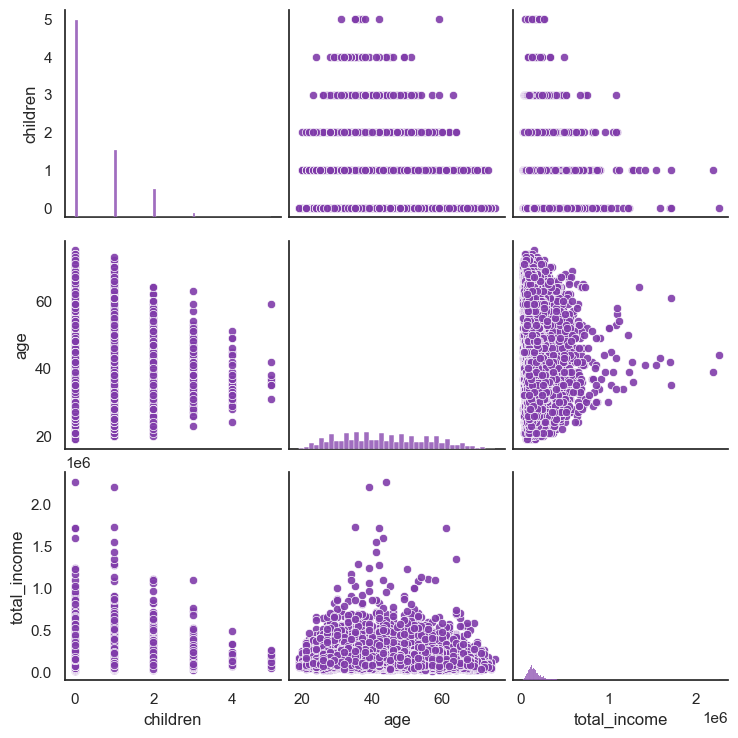

In [82]:
sns.pairplot(df, markers=["o"], 
                        plot_kws={'color': (128/255, 60/255, 170/255, 0.9)},
                        diag_kws={'color': (128/255, 60/255, 170/255, 0.9)})

**Наблюдения:**
- Можно заметить, что чем меньше количество детей, тем больше значений с высоким доходом.

#### Изучаем зависимости между категориальными переменными

In [ ]:
gen = my_module.categorical_heatmap_matrix_gen(df)
next(gen)

**Наблюдения:**
- Женщин замужем больше всего

In [ ]:
next(gen)

**Наблюдения:**
- Среди семейного статуса и занятости больше всего женатых сотрудников

In [ ]:
next(gen)

**Наблюдения:**
- Жентатых без долго явно больше остальных.

In [ ]:
next(gen)

**Наблюдения:**
- Возрастная группа 30-40 лет выделяется среди женатых

In [ ]:
next(gen)

**Наблюдения:**
- Болшая часть женатых имеет доход 100-200 тыс

In [ ]:
next(gen)

**Наблюдения:**
- Больше всего женщин сотрудников

In [ ]:
next(gen)

**Наблюдения:**
- Женщины чаще возвращают кредит. Это видно из пропроций. 

In [ ]:
next(gen)

**Наблюдения:**
- Есть 7 пенсионеров моложе 30 лет

In [ ]:
next(gen)

**Наблюдения:**
- Люди старше 60 лет реже других имеют долги

In [ ]:
next(gen)

**Наблюдения:**
- Долги есть у людей с разным доходом

In [ ]:
next(gen)

**Наблюдения:**
- Можно заметить, что категория возраста от 30 до 40 лет имеет больше зарплату

Посмотрим на распределение количества людей по категориям на сэнки диограмме

In [106]:
df.head(1)

,children,age,education,family_status,gender,income_type,debt,total_income,purpose,dob_cat,total_income_cat
0,1,42,высшее,женат / замужем,F,сотрудник,0,253876,Недвижимость,40-50,200-500 тыс


In [ ]:
my_module.sankey(df, ['debt', 'total_income_cat', 'dob_cat', 'income_type', 'gender', 'family_status', 'education'])

#### Изучаем зависимости между числовыми и категориальными переменными

In [ ]:
my_module.graph_analysis_gen()

In [115]:
def graph_analysis_gen(df):
    category_columns = [
        col for col in df.columns if pd.api.types.is_categorical_dtype(df[col])]
    num_columns = [
        col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    c2 = itertools.combinations(category_columns, 2)
    for cat_pair in c2:
        for num_column in num_columns:
            print(list(cat_pair) + num_column)
            my_module.graph_analysis(df, list(cat_pair), num_column)
            yield

In [136]:
gen = graph_analysis_gen(df)

In [ ]:
Смотрим и в целом и по категориям
У мужчин средний доход выше
У женатых больше детей
Средний доход по семейному статусу примерно одинаковый
Медианный доход предпринимателй больше (причем у гражданского брака больше всего)
У должников в среднем больше детей (можно в разбивке по категориям увидеть что для всех значений в категории так) разбить по полу, у должников среднее количество детей больше у женщин, а у не должников срднее количество детей больше у мужчин
У должников средний возраст ниже (можно в разбивке по категориям (например сем статус) увидеть что для всех значений в категории так)
Медианный доход у должников и нет практически не  отличается
Среднее количество детей у группы 30-40 лет болше сделать ещё в разбивке по полу
дети, семейный стату, категория лет (выделяяется вдова вдовец до 40 лет по среднему количетсу детей)
средний доход по возрастным категоирям и по типу занятости (предприниматель до 30 лет имеет большой доход)
среднее количество детей по группам  дохода (у группы больше 500 тыс больше детей) и в разбивке по семейному статусу и по полу
вдова вдовец и не женат  имеют среднее количество детей ниже (не женат это логично, а вот вдовцы можно подумать)
у вдовцов ниже средний доход
у мужчин среднее количество детей больше
У женщин средний возраст выше
средний возраст по типу занятости и по полу (вместе и отдельно)
Доход по типу занятости и второй график дополнительно по полу разбивка (женщина предприниматель имеет больше средний доход)
Возраст по долгу и полу
средний доход по возрастным группам
среднее количество детей по типу занятости и по долгу (у должников больше всего среднее количество детей у декрета и безработноко) безработный это интерсено
тип занятосит по доходу (предпринматели имеют больше доъод) и можно в разбивке по долгу
долг по возрастным категориям
количество детей по категории доход и по долгу (у должников больше среднее количество детей с доходом до 50 тыс, а у не должников с доходом больше 500 тыс)
средний возраст по группе дохода и по долгу (во всех группах дохода средний возраст должников ниже)
среднее количество детей по группе доход и по группе возраста


In [ ]:
next(gen)

### 4 Формулирование и провера гипотез

Подход следуюищй - мы до раздела проверка гипотез, когда изучаем данные (разделы пропусков, выбросов, дубликатов, зависиместей между перменными и графики),  
то мы делаем выводы и формируем наблюдеия.  
Вот эти наблюдения и выводы нужно проверить в проверке гипотез.  
И потом в основном выводе уже писать не просто, что у нас мужчин больше чем женьшин, а писать, что на уровен значисомти таком то у нас мужчина больше чем  
женщин с таким то доверительным интервалом.  
Таким образом выводы по вомзожности должны проходить через этап проверки гипотез, тогда эти выводы становятся более существенными.  

- Гипотезы появляются, когда мы задаем вопросы данным. Мы изучили данные, преобработали и теперь начинаем задавать вопросы.  
- Выдвигаем гипотезу (заметили что-то необычное и хотим проверить), далее формулируем ее и далее проверяем.  
- Не забываем формулировать гипотезы словами. Пишем что является гипотезой H0, а что гипотезой H1  
- Формулируем все гипотезы, которые хотим проверить. Если будет 100 гипотез, то все 100 нужно сформулировать и потом проверить и сделать вывод.  
- Гипотезы могут быть и простыми вопросами без гипотез H0 и H1, такие гипотезы мы проверяем графиками или анализируя таблицу.  
- Восновном, когда мы собиаремся применить стат аппарат для проверки гипотезы, то мы должны записать ее через H0 и H1.  

Алгоритм проверки статистических гипотез

- постановка задачи
    - Сформулировать, что мы хотим узнать о выборках с точки зрения бизнес задачи (равны ли средние доходы в группах)
    - перевод бизнес-вопроса на язык статистики: средний доход в группах - проверка равенства средних значений
- формулировка гипотез
    - формулировка нулевой гипотезы - с т.зр. равенства стат прараметров оцениваемых выборок   
    (Н0: Средние траты клиентов по группе А равны средним тратам клинентов по группе В)
    - формулировка альтернативной гипотезы - с точки зрения неравенства параметров  
    (Н1: Средние траты клиентов по группе А не равны средним тратам клинентов по группе В)
- выбор критерия alpha (почему 0.05 или 0.01)
    - цена ошибки первого рода (при большой цене ошибки - в мед исследованиях, потенциальном ущербе ) - значение может быть больше, например 0.1
    - в ежедневных бизнес задачах, обычно - 0.05
- анализ распределения
    - визуальная оценка
    - следим за выбросами
    - проверка гипотез о типе распредеделения (например критерий Шапиро-Уилка)
    - если распределение не нормальное и размер выборки достаточный (больше 30-50 элементов)  
    может быть использован t-test именно для проверки гипотезы о равенстве средних.  
    Согласно ЦПТ (центральная предельная теорема) средние этих выборок будут распределены нормально. См. статью Зотова
- выбор критерия
    - при оценке равенства средних T-test или Welch T-test (если есть сомнения, то лучше Уэлча)
        - при рвенстве дисперсий используем обычный т тест
        - если дисперсии в выборках разные, то используем т теста Уэлча
- получение результата
    - расчет p-value
- интерпретация p-value
    - сравнение p-value и alpha
    - если альфа > p-value - отвергаем нулевую гипотезу
    - если альфа < p-value - не можем отвергнуть нулевую гипотезу

In [3]:
df.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья


In [ ]:
Какая у нас задача
- Исследовать взаимосвязь между 2 переменными
    - обе переменные наминативные
        - Хи-квадрат Пирсона (не чувствителен к гетероскедастичности) (нормальность не обязательна)
    - обе переменные количественные
        - Коэффициент корреляции Пирсона (параметрика) (чувствителен к выбросам) (только непрерывные переменные) 
        - Коэффициент корреляции Спирмена (чувствителен к выбросам) / Кендалла (менее чувствителен к выбросам) (непараметрика) (непрерывные переменные и порядковые категориальные переменные)  
    - одна переменная номинативная (принимает 2 занчения), вторая количественная
        - значения
            - Т-критерий Стьюдента (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
                - если дисперсии равны (тест левена, барлета) и количество в группах равно (тест на равенство пропорций), то используем обычный т тест (эта формула более точно даст результат для этого случая)
                - если дисперсии не равны (тест левена, барлета) или количество в группах не равно (тест на равенство пропорций), то используем тест Уэлча (эта формула использует больше неопределенности и лучше подходит для этого случая)
            - U-критерий Манна-Уитни (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
            Если тестируемая фича полностью сдвигает выборку на некий коэффициент theta или масштабирует выборку на некий параметр theta (theta > 0),  
            то критерий Манна-Уитни применим
        - доли
            - Z тест для долей (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
            - Chi-square тест для долей (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
- Исследовать взаимосвязь между несколькими переменными
    - Дисперсионный анализ (параметрика) (дисперсии в группах должны быть примерно равны) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
    - Welch's ANOVA (устройчив к разной дисперсии в группах) (требует более больших размеров групп для точных результатов) (желательно нормальность) (чувствителен к выбросам) (не чувствителен к гетероскедастичности)
    - Критерий Краскела-Уоллиса (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
    - Тест Тьюки (если anova или Краскела-Уоллиса нашил различия) (дисперсии в группах должны быть примерно равны) (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
- Проверить на равенство дисперсий в группах перед anova
    - Levene's test (не требует нормальность) (менее чувствительный)
    - Bartlett's test (требует нормальность) (более чувствительный)

Отличная статья про доверительные интервалы для разных статистик  
https://habr.com/ru/articles/807051/

In [84]:
df.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья


In [96]:
sample1 = df.dropna()[df.gender == 'M']['total_income']
sample2 = df.dropna()[df.gender == 'F']['total_income']

c:\python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Bootstrapping

В бутстрепе, если мы хотим сравнить две выборки, то нельзя смотреть  
где находится исходная разница средних в бутстрапированной выборке  
Так как мы берем бутстреп из наших выборок и впролне реально.что наша разность  
будет близка к с реднему бутстропированной выборки  
Поэтому p value нужно определять по месту нуля в бутстропированной выборке

Посмотрим p value для 0 (если различий нет, то разница должна быть 0)
Для этого посчитаем cdf для + и - среднего, чтобы получить 2 значения cdf
а теперь возьмем минимум и умножим на 2, так как альт гипотеза у нас.что
просто не равно 0, значит и справа и слева

In [12]:
df.head()

,group,outcome
0,A,1
1,A,1
2,A,1
3,A,1
4,A,1


In [15]:
sample1 = df[df.gender=='M'].total_income.dropna()
sample2 = df[df.gender=='F'].total_income.dropna()

In [51]:
def my_statistic(sample1, sample2, axis=-1):
     return np.mean(sample1, axis=-1) - np.mean(sample2, axis=-1)
data = (sample1.to_numpy(), sample2.to_numpy())
res = stats.bootstrap(data, my_statistic, method='percentile', n_resamples=1000, random_state=1)
print(res.confidence_interval)

ConfidenceInterval(low=35705.11632121437, high=42218.55994410035)


In [ ]:
bootstrap_single_sample(sample1)

In [16]:
1 - 10 / 12

0.16666666666666663

In [ ]:
Estimating the power of a non-parametric test using bootstrapping involves simulating the testing process multiple times to estimate the probability of rejecting the null hypothesis. Here's a general outline of the steps:

**Specify the null and alternative hypotheses **: Define the null and alternative hypotheses for your test. For example, the null hypothesis might be that the two groups have the same distribution, and the alternative hypothesis might be that the two groups have different distributions.

Generate simulated data: Generate simulated data that reflects the null hypothesis. For example, you could generate two groups of random data from the same distribution.

Perform the Mann-Whitney U test: Perform the Mann-Whitney U test on the simulated data to obtain a p-value.

Repeat steps 2-3 many times: Repeat steps 2-3 many times (e.g., 1000 times) to generate a distribution of p-values under the null hypothesis.

Estimate the power: Estimate the power of the test by calculating the proportion of times the p-value is below a certain significance level (e.g., 0.05) when the alternative hypothesis is true. To do this, you'll need to generate simulated data that reflects the alternative hypothesis and repeat steps 2-4.

### Промежуточный вывод

### Примеры гипотез

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

### Расчеты

Важно следить за количеством недель в году, если мы создаем столбец месяца.  
Проверять чтобы у нас не появлялась неделя дополнительная, из за того, что мы захватили предыдущий год

### Промежуточный вывод

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

### Промежуточный вывод

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

### Промежуточный вывод

- Как разные цели кредита влияют на его возврат в срок?

### Вывод

### 4. Общий вывод

Что нужно сообщить в выводе
- информацию о том, что удалось подтвердить гипотезы (тут пишем только те, которые удалось подтвердить)
- всю информацию о датасете, которые важны. Дубликаты, которые несут практическую пользу и рекомендации по ним, пропуски также с рекомендациями  
и остальные моменты по данным и рекомендации. Тут важно указывать именно найденные аномалии, которые имеют практическую пользу, которые нужно исправить и прочее.  
Пишем, что были найдены выбросы, они были связаны возможно с тем то и тем то. 
- и в конце обязательно call to action 
написать что необходимо сделать с этими результатами

Советы по оформлению общего выывод
- не нужно вставлять таблицы и графики в вывод. 
В выводе пишем словами самое важное и практически полезное, что мы получили, причем в порядке убывания важности.  
И когда мы пишем, что увидели то-то, то приводим гиперссылку на график или результат ячейки, где это получено.  
Так будет компактный вывод и при необходимости человек сможет быстро перейти и посмотреть график или таблицу  

**Удалось подтвердить гипотезу** о влиянии различных характеристик клиента на факт погашения кредита в срок. Каждый из рассмотренных параметров оказывает влияние на надёжность заёмщика. Рассмотренные факторы по-разному влияют на надёжность заёмщиков. Например, семейное положение оказалось более значимым фактором, чем уровень дохода.


- В ходе анализа исходного набора данных было проведено (были устранены пропуски в двух колонках с числовыми значениями - 'total_income' и 'days_employed').  
- После __устранения явных и скрытых дупликатов__ и удаления оставшихся после обогащения пропусков объем датасета сократился на 0.05%
- Были устранены __выбросы__ в колонках 'days_employed' и 'children': в первом случае выбросы возникли в результате системной ошибки (данные были внесены в часах, а не в днях); во втором случае ошибка, вероятнее всего была допущена людьми, вносившими данные в систему
- ...

**Необходимо**

1. Запросить в отделе по работе с клиентами информацию о возможности брать кредит без подтверждения дохода. 

2. Сообщить коллегам, занимающимся выгрузкой о наличие дубликатов, если вопрос не разрешится, запросить индентификационный номер клиента к датасету.

3. Прописать в задаче на поставку данных формат данных (пол только F и M, положительные значения). Приложить информацию о найденных аномалиях.

In [76]:
importlib.reload(my_module)

<module 'my_module' from 'c:\\Git\\Projects\\Исследование надёжности заёмщиков\\my_module.py'>